In [2]:
%matplotlib inline

from path import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [3]:
pharm = pd.read_csv('Pharmaceuticals.csv')
pharm.set_index('Symbol', inplace = True)

In [4]:
pharm.head()

,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [5]:
pharm.shape

(21, 13)

In [6]:
numerical_variables = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']
num_pharm = pharm[numerical_variables]

In [7]:
# scikit-learn uses population standard deviation
pharm_norm = num_pharm.apply(preprocessing.scale, axis=0)

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(pharm_norm, 
                                     metric='euclidean')
pd.DataFrame(d_norm, columns=num_pharm.index, index=num_pharm.index).head(5)

Symbol,ABT,AGN,AHM,AZN,AVE,BAY,BMY,CHTT,ELN,LLY,...,IVX,JNJ,MRX,MRK,NVS,PFE,PHA,SGP,WPI,WYE
Symbol,,,,,,,,,,,,,,,,,,,,,
ABT,0.000000,4.524618,2.068648,1.710771,2.164139e+00,4.806057,1.850131,5.144714,5.022175,1.457814,...,2.689547,2.391509,4.017109,2.746934,1.970213,3.983231,2.980819,1.345014,2.953797,3.113586
AGN,4.524618,0.000000,4.043186,5.030808,4.757351e+00,4.973768,5.553321,5.750821,6.860601,5.267192,...,4.580415,5.449269,5.614386,5.578355,5.603897,7.077392,2.426388,4.842078,5.130736,6.605654
AHM,2.068648,4.043186,0.000000,2.422635,2.548593e+00,3.726153,2.665217,4.877898,4.811808,3.318325,...,2.373755,3.682513,4.222306,3.445005,3.414021,5.398973,2.997876,1.746806,3.016647,4.288958
AZN,1.710771,5.030808,2.422635,0.000000,2.697286e+00,5.190658,1.611417,5.860410,5.097367,2.465366,...,3.363249,2.006687,4.374660,1.905195,3.131669,3.186200,3.807570,1.107202,3.498439,3.407076
AVE,2.164139,4.757351,2.548593,2.697286,2.980232e-08,4.882317,3.484580,5.222098,3.841354,2.982647,...,2.445794,3.730682,2.999547,3.558161,3.413135,4.606252,2.785574,2.525725,1.328568,4.359629


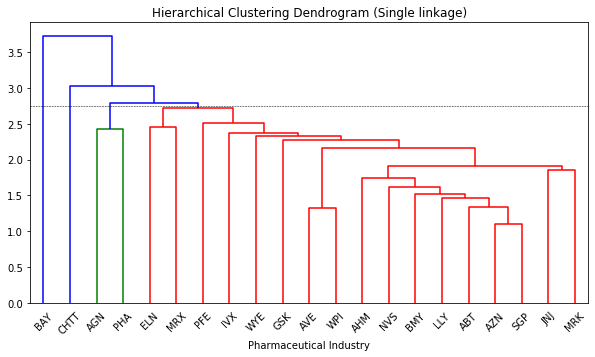

In [8]:
Z = linkage(pharm_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Pharmaceutical Industry')
dendrogram(Z, labels=pharm_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

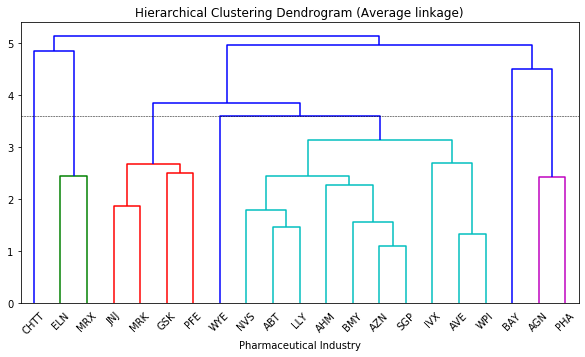

In [9]:
Z = linkage(pharm_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Pharmaceutical Industry')
dendrogram(Z, labels=pharm_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusteres formed,etc

Interpret the clusters with respect to the categorical variables used in forming the clusters

Is there a pattern in the clusters with respect to the numerical variables(10-12) (those not used in forming the clusters)

Provide an appropriate name for each of the cluster using any or all of the variables in the dataset.

In [13]:
memb = fcluster(linkage(pharm_norm, 'single'), 4, criterion='maxclust')
memb = pd.Series(memb, index=pharm_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  AGN, PHA
2 :  ABT, AHM, AZN, AVE, BMY, ELN, LLY, GSK, IVX, JNJ, MRX, MRK, NVS, PFE, SGP, WPI, WYE
3 :  CHTT
4 :  BAY


In [14]:
pharm_norm.groupby(memb).mean()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
1,-0.450099,-0.481791,2.766702,-0.855572,-0.946301,0.236328,-0.145203,-0.119731,-1.451496
2,0.153744,-0.156628,-0.336493,0.194918,0.284958,0.027803,-0.163332,0.142469,0.366329
3,-1.000888,1.294279,0.033806,-0.115154,-1.196630,-0.472657,3.835226,-0.648387,-1.279725
4,-0.712554,2.331983,0.153174,-1.487304,-1.755058,-0.472657,-0.768169,-1.534116,-2.044884


In [15]:
memb = fcluster(linkage(pharm_norm, 'average'), 4, criterion='maxclust')
memb = pd.Series(memb, index=pharm_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  ELN, MRX
2 :  CHTT
3 :  ABT, AHM, AZN, AVE, BMY, LLY, GSK, IVX, JNJ, MRK, NVS, PFE, SGP, WPI, WYE
4 :  AGN, BAY, PHA


In [16]:
pharm_norm.groupby(memb).mean()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
1,-0.990747,1.553705,-0.588164,-0.858968,-1.013697,-1.890626e+00,0.543339,1.754677,0.250591
2,-1.000888,1.294279,0.033806,-0.115154,-1.196630,-4.726566e-01,3.835226,-0.648387,-1.279725
3,0.306342,-0.384673,-0.302937,0.335436,0.458112,2.835940e-01,-0.257555,-0.072492,0.381761
4,-0.537584,0.456134,1.895526,-1.066149,-1.215887,-3.330669e-16,-0.352858,-0.591193,-1.649292
